In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [63]:
path = "/content/drive/MyDrive/coderush project/Fraud.csv"

In [64]:
df = pd.read_csv(path)

In [65]:
df.head()
df.shape

(6362620, 11)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [67]:
df.rename(columns = {'nameOrig': 'nameOrg','newbalanceOrig':'newbalanceOrg'},inplace = True)

In [68]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrg         object 
 4   oldbalanceOrg   float64
 5   newbalanceOrg   float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [69]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [70]:
df.isnull().any()

step              False
type              False
amount            False
nameOrg           False
oldbalanceOrg     False
newbalanceOrg     False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

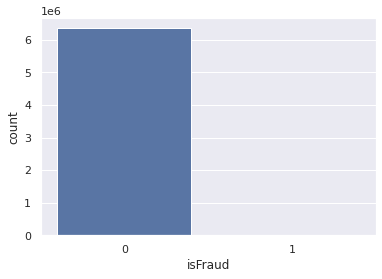

In [71]:
sns.countplot(x='isFraud', data= df) 

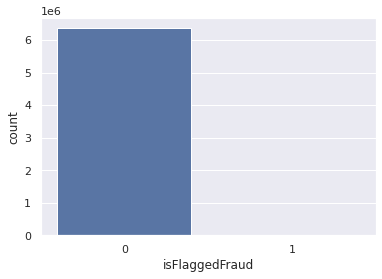

In [72]:
sns.countplot(x='isFlaggedFraud', data= df) 


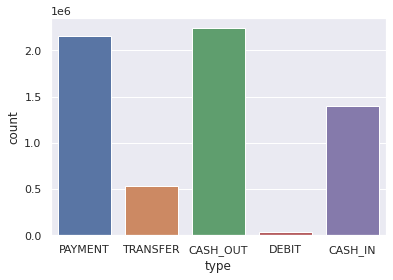

In [73]:
sns.countplot(x='type', data= df) 


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


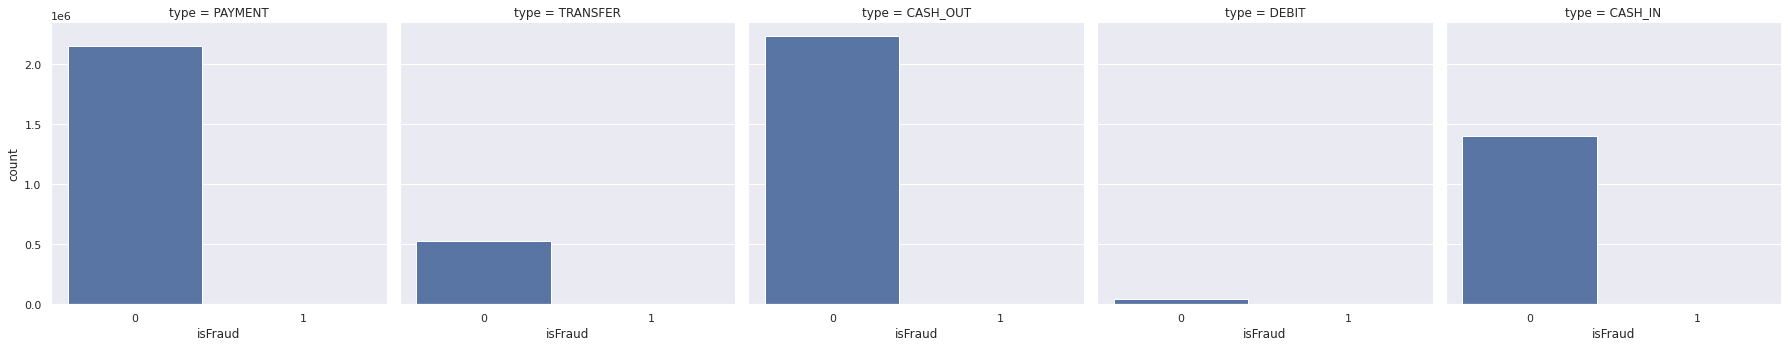

In [74]:
sns.factorplot(x='isFraud', col='type', kind='count', data=df);

In [75]:
print('Types of fraudulent transactions: {}'.format(\
list(df.loc[df.isFraud == 1].type.drop_duplicates().values))) 



Types of fraudulent transactions: ['TRANSFER', 'CASH_OUT']


In [76]:
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print ('\n Fraudulent TRANSFERs = {}'.\
       format(len(dfFraudTransfer)))

print ('\n Fraudulent CASH_OUTs = {}'.\
       format(len(dfFraudCashout))) 


 Fraudulent TRANSFERs = 4097

 Fraudulent CASH_OUTs = 4116


In [77]:
len(df.loc[df['isFlaggedFraud'] == 1])

16

In [78]:
df.loc[df['isFlaggedFraud'] == 1].type.unique()


array(['TRANSFER'], dtype=object)

In [79]:
print('\nMin, Max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where \
oldBalanceOrig = \
newBalanceOrig: {}'.format(\
[df.loc[(df.isFlaggedFraud == 0) & (df.oldbalanceOrg \
== df.newbalanceOrg)].oldbalanceOrg.min(), \
round(df.loc[(df.isFlaggedFraud == 0) & (df.oldbalanceOrg \
               == df.newbalanceOrg)].oldbalanceOrg.max())]))



Min, Max of oldBalanceOrig for isFlaggedFraud = 0 TRANSFERs where oldBalanceOrig = newBalanceOrig: [0.0, 17655792]


In [80]:
print('\nMin, Max of oldBalanceOrig for isFlaggedFraud = 1 TRANSFERs: {}'.\
format([round(df.oldbalanceOrg.min()), round(df.oldbalanceOrg.max())]))



Min, Max of oldBalanceOrig for isFlaggedFraud = 1 TRANSFERs: [0, 59585040]


outlier

In [81]:
import matplotlib.pyplot as plt


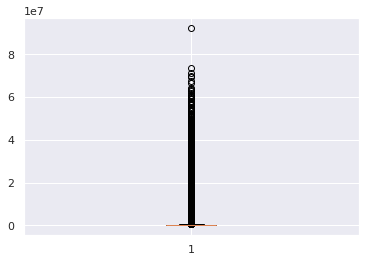

In [82]:
plt.boxplot(df['amount'])
plt.show()

In [83]:
df.loc[df['amount'] > 80000000]

,step,type,amount,nameOrg,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3686583,276,TRANSFER,92445516.64,C1715283297,0.0,0.0,C439737079,9595.98,92455112.62,0,0


In [84]:
df.drop(3686583, inplace= True) #dropping outlier row

In [85]:
indexes = df.loc[df['amount'] > 70000000].index
indexes

Int64Index([4060598, 4146397], dtype='int64')

In [86]:
df.drop(indexes, inplace= True)


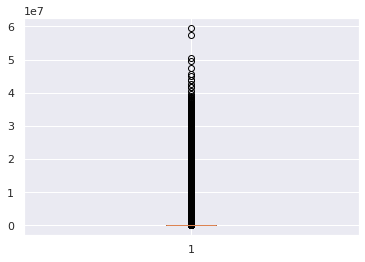

In [87]:
plt.boxplot(df['oldbalanceOrg'])
plt.show()

In [88]:
df.loc[df['oldbalanceOrg'] > 45000000]

,step,type,amount,nameOrg,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5996399,425,TRANSFER,10000000.0,C40489106,59585040.37,49585040.37,C650095152,0.0,0.0,1,0
5996401,425,TRANSFER,10000000.0,C1551381510,49585040.37,39585040.37,C1042012237,0.0,0.0,1,0
6281474,646,TRANSFER,10000000.0,C590657619,50399045.08,40399045.08,C1971187430,0.0,0.0,1,0
6362452,730,TRANSFER,10000000.0,C726730575,57316255.05,47316255.05,C1364745638,0.0,0.0,1,0
6362454,730,TRANSFER,10000000.0,C507645439,47316255.05,37316255.05,C270374999,0.0,0.0,1,0
6362576,741,TRANSFER,10000000.0,C780743034,45674547.89,35674547.89,C491519946,0.0,0.0,1,0


In [89]:
indexesOldbalanceOrg = df.loc[df['oldbalanceOrg'] > 45000000].index

In [90]:
df.drop(indexesOldbalanceOrg, inplace= True)

In [91]:
df.loc[df['oldbalanceOrg'] > 45000000]

,step,type,amount,nameOrg,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


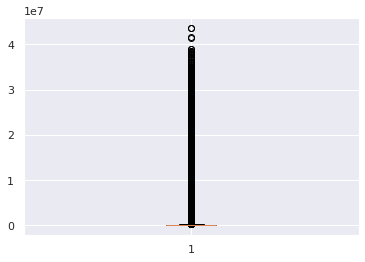

In [92]:
plt.boxplot(df['newbalanceOrg'])
plt.show()

In [93]:
df.loc[df['oldbalanceOrg'] > 40000000]


,step,type,amount,nameOrg,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4180200,304,PAYMENT,8301.85,C1568160039,41699144.49,41690842.64,M1906748245,0.00,0.00,0,0
4180201,304,CASH_OUT,258483.17,C438977024,41690842.64,41432359.46,C1162702437,6449276.06,6707759.23,0,0
4203639,305,CASH_OUT,132238.97,C559275248,43818855.30,43686616.33,C1114436169,5327024.57,5459263.54,0,0
4203640,305,PAYMENT,12814.12,C2080486364,43686616.33,43673802.21,M928977012,0.00,0.00,0,0
5563705,387,TRANSFER,10000000.00,C576718894,44892193.09,34892193.09,C673002421,0.00,0.00,1,0
6266405,617,TRANSFER,10000000.00,C794290057,42542664.27,32542664.27,C262998076,0.00,0.00,1,0
6281476,646,TRANSFER,10000000.00,C130070267,40399045.08,30399045.08,C970791522,0.00,0.00,1,0


In [94]:
indexesNewbalanceOrg = df.loc[df['newbalanceOrg'] > 40000000].index

In [95]:
df.drop(indexesNewbalanceOrg, inplace= True)


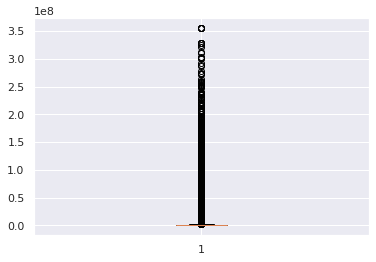

In [96]:
plt.boxplot(df['oldbalanceDest'])
plt.show()

In [97]:
df.loc[df['oldbalanceDest'] > 350000000]


,step,type,amount,nameOrg,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4596803,328,CASH_IN,171982.69,C758787020,31748.00,203730.69,C439737079,3.555534e+08,3.553814e+08,0,0
4721497,332,CASH_IN,195896.55,C494525103,4178494.78,4374391.33,C439737079,3.553814e+08,3.551855e+08,0,0
5380607,376,CASH_OUT,194946.47,C4896808,0.00,0.00,C439737079,3.551855e+08,3.553805e+08,0,0
5486389,380,TRANSFER,635405.82,C1666289749,0.00,0.00,C439737079,3.553805e+08,3.560159e+08,0,0
5920180,404,CASH_OUT,163389.56,C1323053481,0.00,0.00,C439737079,3.560159e+08,3.561793e+08,0,0


In [98]:
indexesOldbalanceDest = df.loc[df['oldbalanceDest'] > 35000000].index
df.drop(indexesOldbalanceDest, inplace= True)

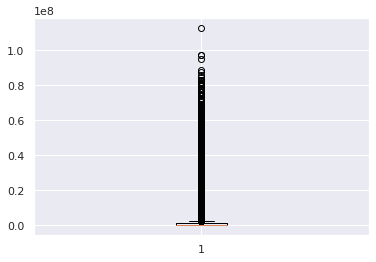

In [99]:
plt.boxplot(df['newbalanceDest'])
plt.show()

In [100]:
df.loc[df['newbalanceDest'] > 90000000]


,step,type,amount,nameOrg,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3757065,279,TRANSFER,21058476.50,C1534780687,0.00,0.0,C1472140329,33755978.87,1.130072e+08,0,0
3864130,283,TRANSFER,17299521.93,C1542160234,0.00,0.0,C2098154505,27559695.73,9.732262e+07,0,0
4108989,302,TRANSFER,24010645.99,C1028418367,0.00,0.0,C1720463306,25971594.07,9.756187e+07,0,0
4145948,303,TRANSFER,30620873.42,C1182452240,138404.76,0.0,C1131110881,32918802.23,9.540580e+07,0,0


In [101]:
indexesNewbalanceDest = df[df['newbalanceDest'] > 90000000].index
df.drop(indexesNewbalanceDest , inplace=True)

In [102]:
df.loc[df['newbalanceDest'] > 90000000]


,step,type,amount,nameOrg,oldbalanceOrg,newbalanceOrg,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [103]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

X['isFraud']

2          1
3          1
15         0
19         0
24         0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 2765896, dtype: int64

In [104]:
import numpy as np

In [105]:


y = X['isFraud']
del X['isFraud']


X = X.drop(['nameOrg', 'nameDest', 'isFlaggedFraud'], axis = 1)

X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int) 

In [106]:
 X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), \
      ['oldbalanceDest', 'newbalanceDest']] = - 1

In [107]:
X.loc[(X.oldbalanceOrg == 0) & (X.newbalanceOrg == 0) & (X.amount != 0), \
      ['oldbalanceOrg', 'newbalanceOrg']] = np.nan

In [108]:
X['errorBalanceOrg'] = X.newbalanceOrg + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

In [109]:
limit = len(X)

def plotStrip(x, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, \
             hue = hue, jitter = 0.4, marker = '.', \
             size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['genuine', 'fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash out'], bbox_to_anchor=(1, 1), \
               loc=2, borderaxespad=0, fontsize = 16);
    return ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


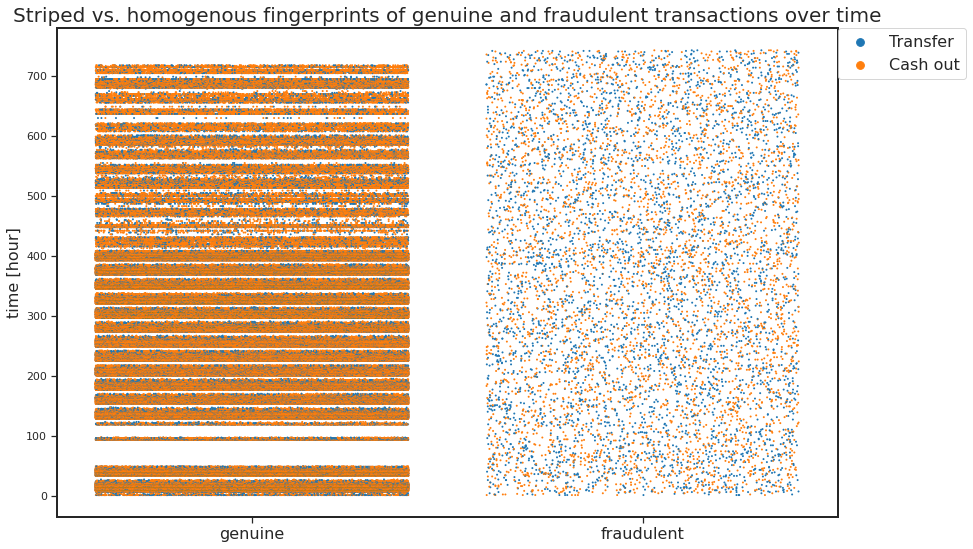

In [110]:
ax = plotStrip(y[:limit], X.step[:limit], X.type[:limit])
ax.set_ylabel('time [hour]', size = 16)
ax.set_title('Striped vs. homogenous fingerprints of genuine and fraudulent \
transactions over time', size = 20);

In [111]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier

In [112]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.2, \
                                                random_state = randomState)

In [116]:
clf1 = XGBClassifier(max_depth = 6, scale_pos_weight = 350, \
                n_jobs = 4)
probabilities = clf1.fit(trainX, trainY).predict_proba(testX)
print('AUPRC = {}'.format(average_precision_score(testY, \
                                              probabilities[:, 1])))

AUPRC = 0.9963145021510666
